In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential,load_model
from keras.layers import Dense,Reshape,advanced_activations
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime

(4407, 2171)
(4368, 2016)
Train Score: 1801.59 MSE (42.45 RMSE)
Test Score: 27266.68 MSE (165.13 RMSE)


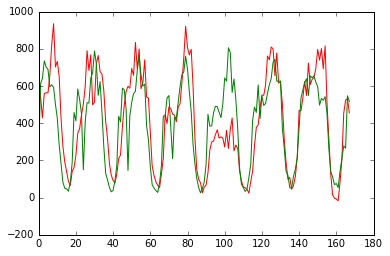

In [102]:
# fix random seed for reproducibility

np.random.seed(7)
mldf = pd.read_csv('mltest.csv', engine='python')
# First thing first, format data to what we need
mltt = mldf.ix[:,[3,4,5,6,8,9,10,7]].copy()
mltt.columns = ['a','b','c','d','e','f','g','h'];mltt
mltt.replace(to_replace='東',value=1,inplace=True );mltt
mltt.c=pd.to_datetime(mltt.c);
mltt.c = pd.to_datetime(mltt.c);
mltt['weekday'] = mltt['c'].dt.dayofweek;mltt
mltt.c= mltt.c.dt.dayofyear;mltt
mltt.replace(to_replace='00:00:00',value=0,inplace=True );mltt
mltt.replace(to_replace='01:00:00',value=1,inplace=True );mltt
mltt.replace(to_replace='02:00:00',value=2,inplace=True );mltt
mltt.replace(to_replace='03:00:00',value=3,inplace=True );mltt
mltt.replace(to_replace='04:00:00',value=4,inplace=True );mltt
mltt.replace(to_replace='05:00:00',value=5,inplace=True );mltt
mltt.replace(to_replace='06:00:00',value=6,inplace=True );mltt
mltt.replace(to_replace='07:00:00',value=7,inplace=True );mltt
mltt.replace(to_replace='08:00:00',value=8,inplace=True );mltt
mltt.replace(to_replace='09:00:00',value=9,inplace=True );mltt
mltt.replace(to_replace='10:00:00',value=10,inplace=True );mltt
mltt.replace(to_replace='11:00:00',value=11,inplace=True );mltt
mltt.replace(to_replace='12:00:00',value=12,inplace=True );mltt
mltt.replace(to_replace='13:00:00',value=13,inplace=True );mltt
mltt.replace(to_replace='14:00:00',value=14,inplace=True );mltt
mltt.replace(to_replace='15:00:00',value=15,inplace=True );mltt
mltt.replace(to_replace='16:00:00',value=16,inplace=True );mltt
mltt.replace(to_replace='17:00:00',value=17,inplace=True );mltt
mltt.replace(to_replace='18:00:00',value=18,inplace=True );mltt
mltt.replace(to_replace='19:00:00',value=19,inplace=True );mltt
mltt.replace(to_replace='20:00:00',value=20,inplace=True );mltt
mltt.replace(to_replace='21:00:00',value=21,inplace=True );mltt
mltt.replace(to_replace='22:00:00',value=22,inplace=True );mltt
mltt.replace(to_replace='23:00:00',value=23,inplace=True );mltt

cols =mltt.columns.tolist()
mltt= mltt[cols[:3]+cols[-1:]+cols[3:-1]];mltt
mltt.columns = ['a','b','c','d','e','f','g','h','i'];mltt

mlttva = mltt.values
mlttva = mlttva.astype('float32')

# seperate train and test data to 67%/33%
train_size = int(len(mlttva) * 0.67)
test_size = len(mlttva) - train_size
train, test = mlttva[0:train_size,:], mlttva[train_size:len(mlttva),:]
# check the lenth of data
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(0,len(dataset)-look_back-1,look_back):
        a = dataset[i:(i+look_back), 0:9]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i+look_back+look_back, 8])
#     return dataX,dataY
    return np.array(dataX), np.array(dataY)
# magic number
look_back = 168
# cut off remainder
train = train[:-(len(train)%look_back)]
test = test[:-(len(test)%look_back)]
# check data lenth when cut off remainder
print(len(train), len(test))
# seperate data to input"X" and output"Y"
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()

# RESHAPE is  working !!!!! >0<"
model.add(Reshape((look_back*9,), input_shape=(look_back,9)))
# Add layers to neruon network
model.add(Dense(190,input_dim=(look_back*9), activation='relu'))
model.add(Dense(256, init='uniform', activation='relu'))
model.add(Dense(look_back))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=168, batch_size=3, verbose=0)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# predict result
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Jackie veriosn plot

pre = testPredict.reshape(len(testPredict)*len(testPredict[0]),)
ori = testY.reshape(len(testY)*len(testY[0]),)

plt.plot(pre[-168:],color='r')
plt.plot(ori[-168:],color='g')
plt.show()




In [18]:
#save model to hdf5
model.save('jackiedl.h5')


In [77]:
def clean(inp):
    outp = inp.ix[:,[3,4,5,6,8,9,10,7]].copy()
    outp.columns = ['a','b','c','d','e','f','g','h'];outp
    outp.replace(to_replace='東',value=1,inplace=True );outp
    outp.c=pd.to_datetime(outp.c);
    outp['weekday'] = outp['c'].dt.dayofweek;outp
    outp.c= outp.c.dt.dayofyear;outp
    outp.replace(to_replace='00:00:00',value=0,inplace=True );outp
    outp.replace(to_replace='01:00:00',value=1,inplace=True );outp
    outp.replace(to_replace='02:00:00',value=2,inplace=True );outp
    outp.replace(to_replace='03:00:00',value=3,inplace=True );outp
    outp.replace(to_replace='04:00:00',value=4,inplace=True );outp
    outp.replace(to_replace='05:00:00',value=5,inplace=True );outp
    outp.replace(to_replace='06:00:00',value=6,inplace=True );outp
    outp.replace(to_replace='07:00:00',value=7,inplace=True );outp
    outp.replace(to_replace='08:00:00',value=8,inplace=True );outp
    outp.replace(to_replace='09:00:00',value=9,inplace=True );outp
    outp.replace(to_replace='10:00:00',value=10,inplace=True );outp
    outp.replace(to_replace='11:00:00',value=11,inplace=True );outp
    outp.replace(to_replace='12:00:00',value=12,inplace=True );outp
    outp.replace(to_replace='13:00:00',value=13,inplace=True );outp
    outp.replace(to_replace='14:00:00',value=14,inplace=True );outp
    outp.replace(to_replace='15:00:00',value=15,inplace=True );outp
    outp.replace(to_replace='16:00:00',value=16,inplace=True );outp
    outp.replace(to_replace='17:00:00',value=17,inplace=True );outp
    outp.replace(to_replace='18:00:00',value=18,inplace=True );outp
    outp.replace(to_replace='19:00:00',value=19,inplace=True );outp
    outp.replace(to_replace='20:00:00',value=20,inplace=True );outp
    outp.replace(to_replace='21:00:00',value=21,inplace=True );outp
    outp.replace(to_replace='22:00:00',value=22,inplace=True );outp
    outp.replace(to_replace='23:00:00',value=23,inplace=True );outp
    cols =outp.columns.tolist()
    outp= outp[cols[:3]+cols[-1:]+cols[3:-1]];outp
    outp.columns = ['a','b','c','d','e','f','g','h','i'];outp
    outpp = outp.values
    outpp = outpp.astype('float32')
    return outpp
    

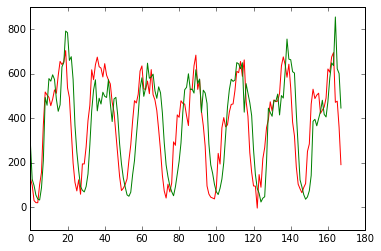

In [103]:
test = pd.read_csv('realtet.csv',header=None, engine='python')
res = pd.read_csv('realresult.csv',header=None, engine='python')

testva = np.array([clean(test)])
resva = np.array([clean(res)])

testvapre= model.predict(testva)
prett = testvapre.reshape(len(testvapre)*len(testvapre[0]),)
plt.plot(prett,color='r')
plt.plot(resva[0][:,-1],color='g')
plt.show()

In [82]:
# compare R LR model
predf = pd.DataFrame(pre[-168:]);
predf.ix[110:130]

,0
110,27.844992
111,44.840790
112,-20.214939
113,10.156651
114,50.554195
115,195.815079
116,351.060791
117,362.963898
118,410.215363
119,475.942200


In [69]:
rdf = pd.read_csv('R_pre.csv',header=None)


todf = pd.DataFrame(test[-168:]);
todf.columns=['a','b','c','d','e','f','g','h','i']
todf.ix[todf.d == 0,:]


,a,b,c,d,e,f,g,h,i
11,2.0,1.0,354.0,0.0,0.0,38.102158,2.835000,122.389999,285.254211
12,2.0,1.0,354.0,0.0,1.0,37.561161,2.030000,115.759995,181.000000
13,2.0,1.0,354.0,0.0,2.0,38.275002,0.755000,104.615005,83.000000
14,2.0,1.0,354.0,0.0,3.0,36.080002,0.275000,71.599998,50.500000
15,2.0,1.0,354.0,0.0,4.0,25.198000,1.035000,48.910000,46.500000
16,2.0,1.0,354.0,0.0,5.0,35.877270,0.410000,49.955002,34.500000
17,2.0,1.0,354.0,0.0,6.0,36.035824,1.325000,96.440002,82.500000
18,2.0,1.0,354.0,0.0,7.0,37.661953,2.175000,141.000000,188.500000
19,2.0,1.0,354.0,0.0,8.0,33.084412,6.750000,77.595001,457.000000
20,2.0,1.0,354.0,0.0,9.0,36.467728,5.410000,105.214996,412.500000
